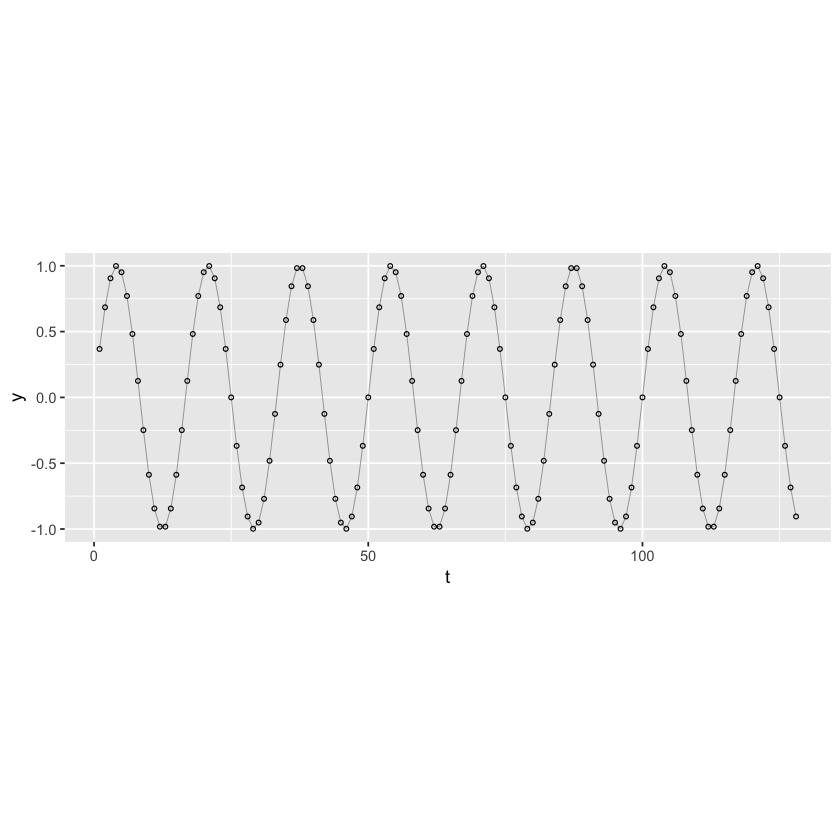

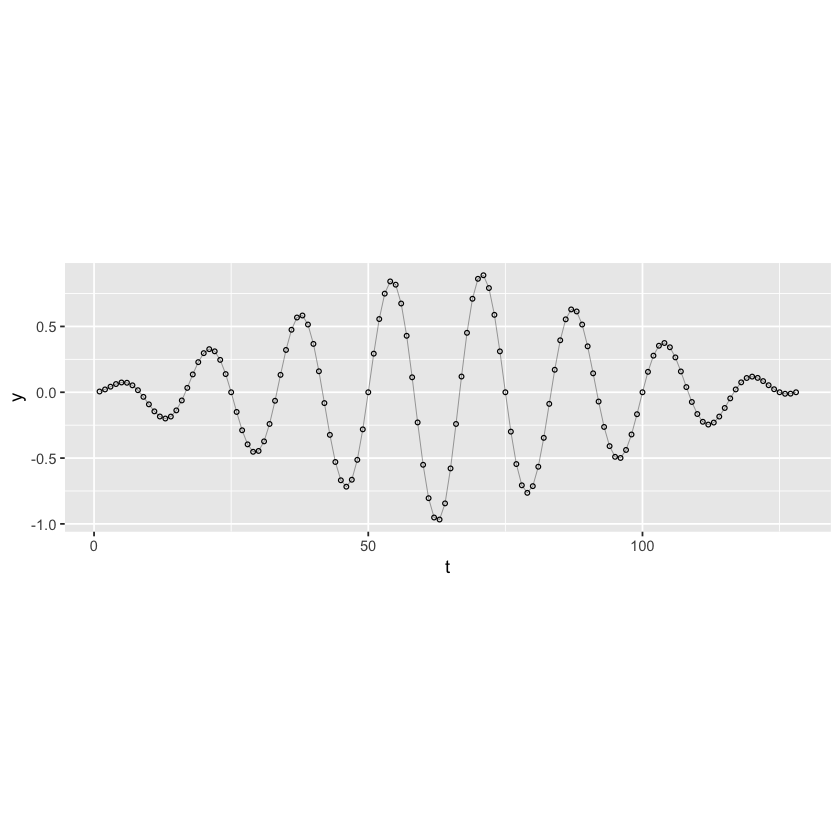

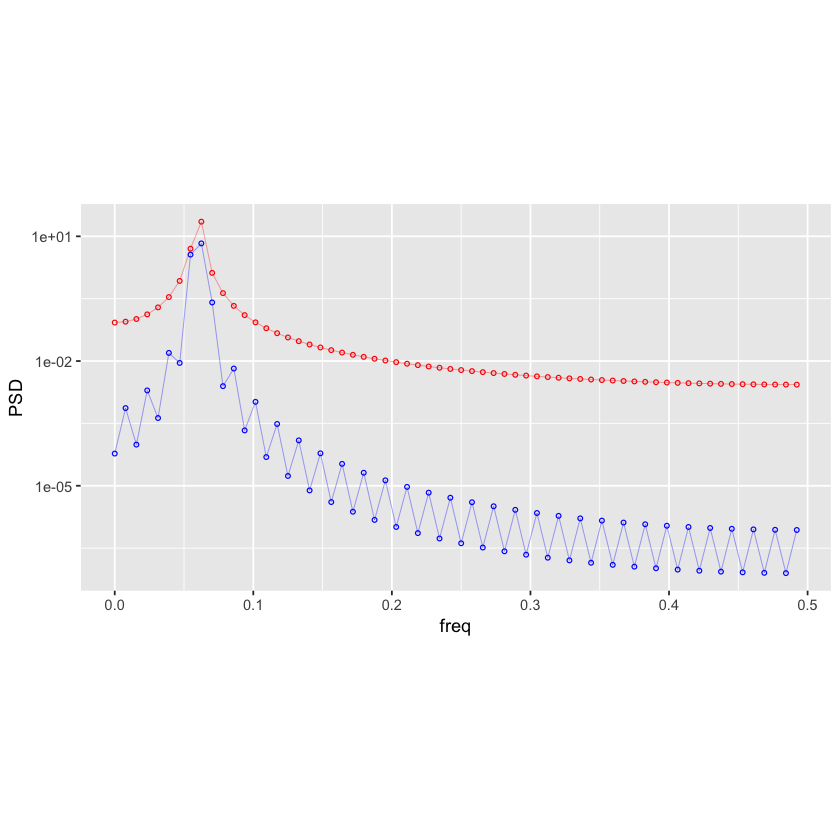

In [6]:
# Run this cell first.  Run a few times while varying the "ftest" parameter.  
# Question 1: How this changing this parameter move the peak in the second ("freq" vs "PSD") plot?
# (PSD = Power Spectral Density, FYI)

library(ggplot2)

ftest=.06;

x<-seq(from=1,to=128,by=1)
y<-sin(2*pi*ftest*x)
y2<-sin(2*pi*ftest*x)*(1-abs(x-64)/64)

df <- data.frame(t=t,y=y)
df2 <- data.frame(t=t,y=y2)

ggplot(df, aes(x=t, y=y)) +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = 24)  

ggplot(df2, aes(x=t, y=y)) +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = 24)  


N <- nrow(df)
Peridf2 <- (1/N)*abs(fft(df$y))^2
Peridf22 <- (1/N)*abs(fft(df2$y))^2
f    <- seq(0,1.0-1/N,by=1/N)
dfPeri <- data.frame(freq=f[seq(from = 1, to = length(f)/2, by = 1)],PSD=Peridf2[seq(from = 1, to = length(Peridf2)/2, by = 1)])
dfPeri2 <- data.frame(freq=f[seq(from = 1, to = length(f)/2, by = 1)],PSD=Peridf22[seq(from = 1, to = length(Peridf22)/2, by = 1)])
ggplot(dfPeri, aes(x=freq, y=PSD)) +
  scale_y_continuous(trans='log10') +
  geom_point(size=1, shape=1,color="red") +
  geom_line(size=.1,color="red")+
  geom_point(data=dfPeri2,aes(x=freq, y=PSD),size=1, shape=1,color="blue") +
  geom_line(data=dfPeri2,aes(x=freq, y=PSD),size=.1,color="blue")+
  coord_fixed(ratio = .03)  

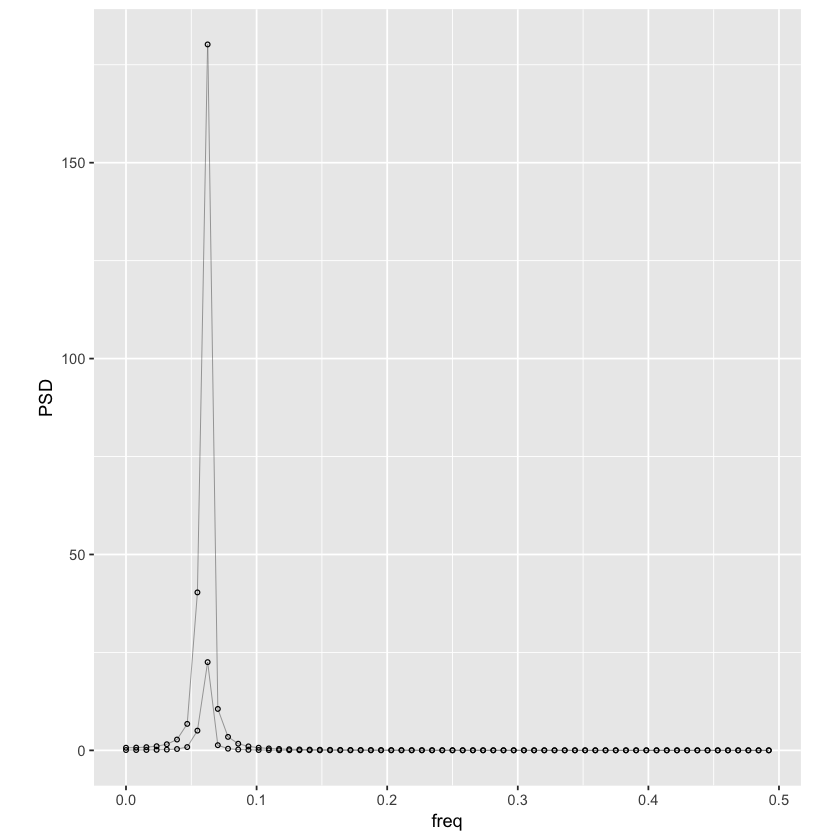

In [7]:
# Run this cell first.  Run a few times while varying the "ftest" parameter.  
# Question 1: How this changing this parameter move the peak in the second ("freq" vs "PSD") plot?
# (PSD = Power Spectral Density, FYI)

library(ggplot2)

ftest=.06;

x<-seq(from=1,to=128,by=1)
y<-sin(2*pi*ftest*x)

df <- data.frame(t=t,y=y)


t2<-seq(from=1,to=1024,by=1)
y2<-sin(2*pi*ftest*x)

df2 <- data.frame(t=t2,y=y2)


N <- nrow(df)
Peridf2 <- (1/N)*abs(fft(df$y))^2
f    <- seq(0,1.0-1/N,by=1/N)
dfPeri <- data.frame(freq=f[seq(from = 1, to = length(f)/2, by = 1)],PSD=Peridf2[seq(from = 1, to = length(Peridf2)/2, by = 1)])

N2 <- nrow(df2)
Peridf22 <- (1/N2)*abs(fft(df2$y))^2
f2    <- seq(0,1.0-1/N,by=1/N2)
dfPeri2 <- data.frame(freq=f2[seq(from = 1, to = length(f2)/2, by = 8)],PSD=Peridf22[seq(from = 1, to = length(Peridf22)/2, by = 8)])

ggplot(dfPeri, aes(x=freq, y=PSD)) +
 # scale_y_continuous(trans='log10') +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  geom_point(data=dfPeri2, aes(x=freq, y=PSD),size=1, shape=1) +
  geom_line(data=dfPeri2, aes(x=freq, y=PSD),size=.1)+
  coord_fixed(ratio = .003)  

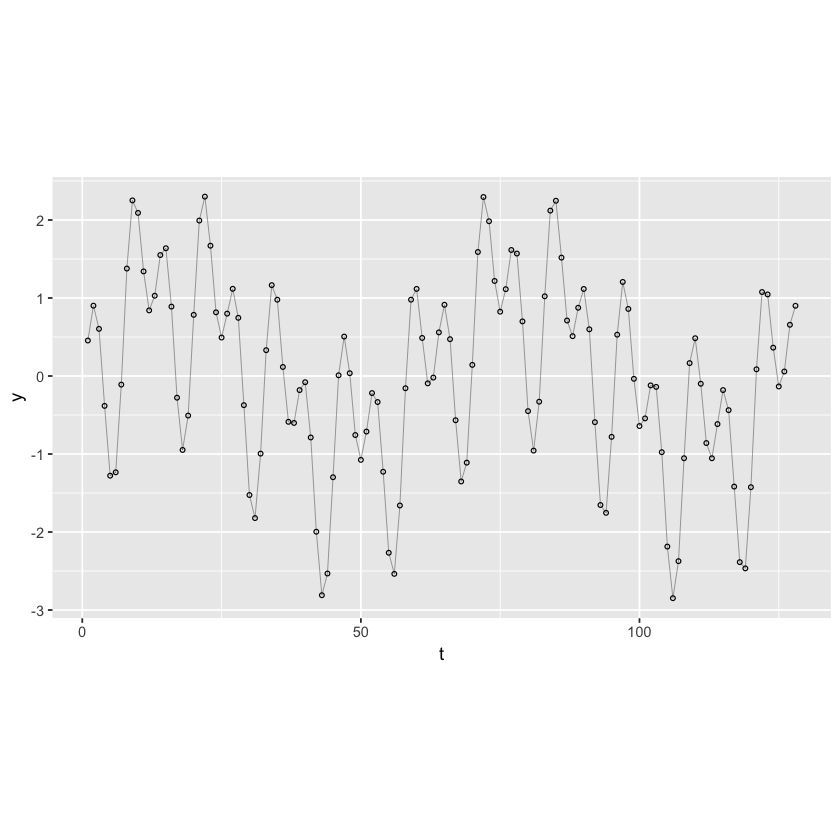

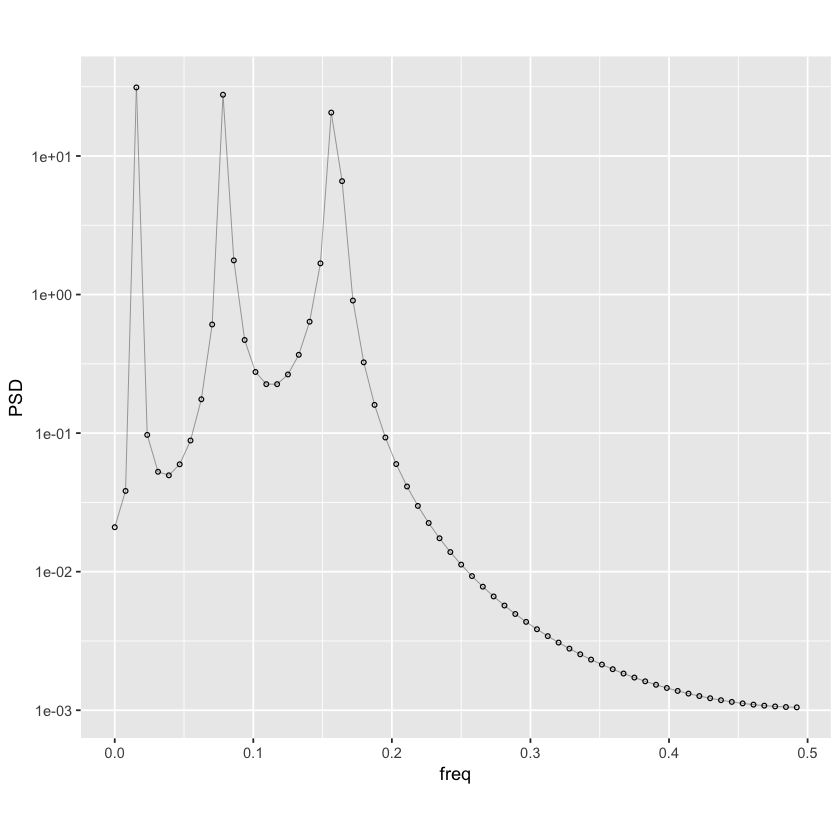

In [8]:
# Question 2: Describe in words what are the constituents of the "y" variable 
# Question 3: Look at the first plot of t vs. y.  Do you see sinusoidal functions in it?  Would you see them if you didn't know they should be in there?
# Question 4: How many peaks are in the PSD plot here?  What do you think they correspond to?

x<-seq(from=1,to=128,by=1)
y<-sin(0.1*x)+sin(0.5*x-4)+cos(x+10)

df <- data.frame(t=t,y=y)

ggplot(df, aes(x=t, y=y)) +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = 14)  

N <- nrow(df)
Peridf2 <- (1/N)*abs(fft(df$y))^2
f    <- seq(0,1.0-1/N,by=1/N)
dfPeri <- data.frame(freq=f[1:64],PSD=Peridf2[1:64])
ggplot(dfPeri, aes(x=freq, y=PSD)) +
  scale_y_continuous(trans='log10') +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = .1)  

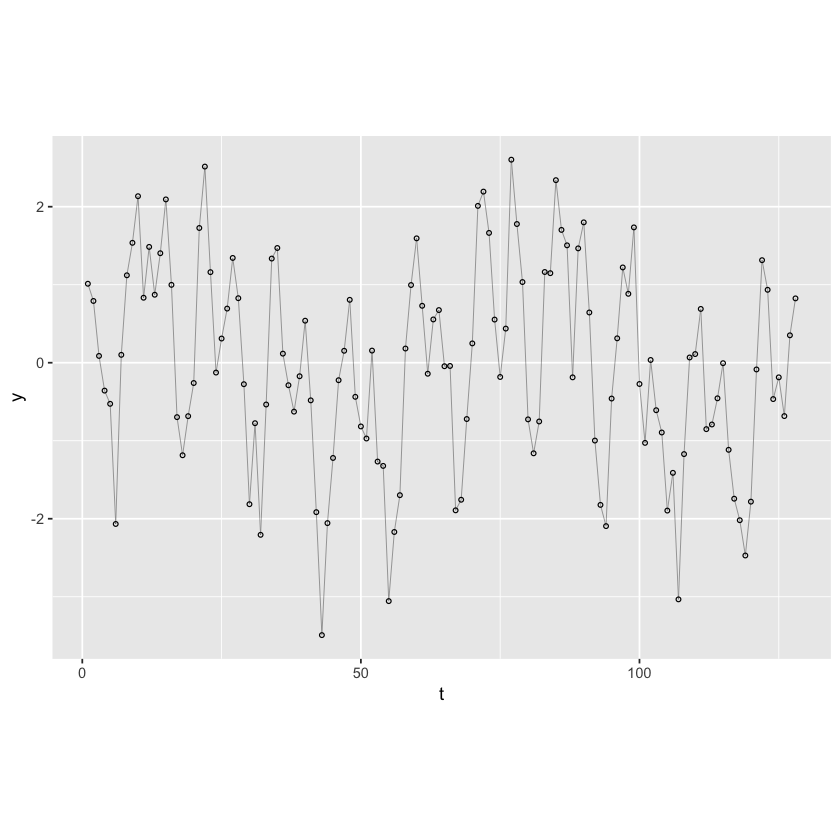

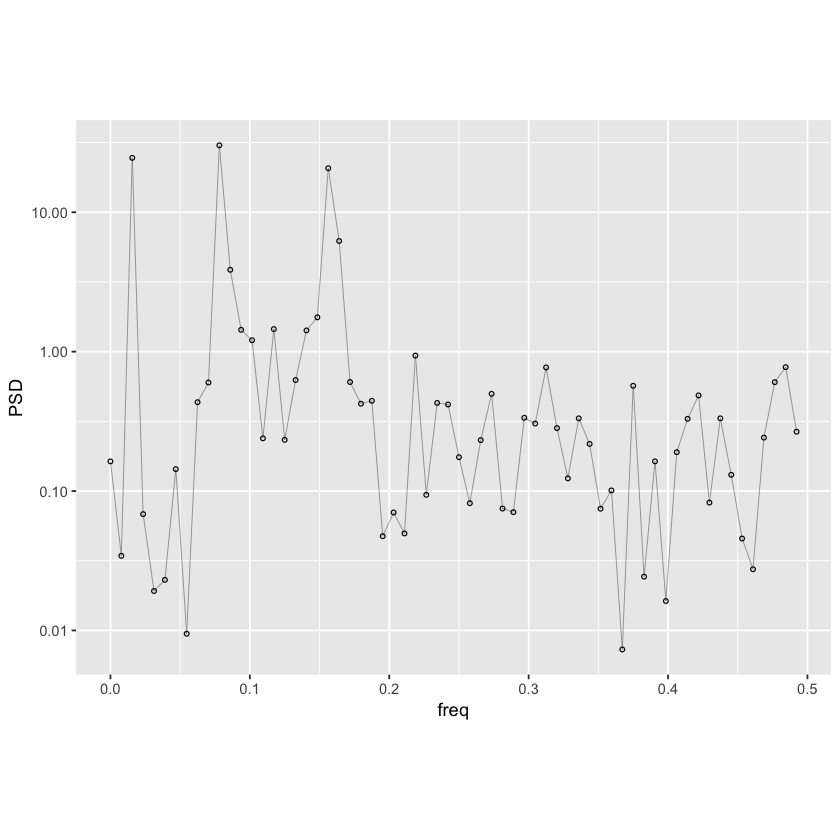

In [9]:
# Run this cell several times while varying the "noiselevel" parameter
# Question 5: At what noiselevel parameter value would you say the peaks in the PSD plot disappear?  

noiselevel=.5;

x<-seq(from=1,to=128,by=1)
y<-sin(0.1*x)+sin(0.5*x-4)+cos(x+10)+rnorm(length(t),mean=0,sd=noiselevel)

df <- data.frame(t=t,y=y)

ggplot(df, aes(x=t, y=y)) +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = 14)  

N <- nrow(df)
Peridf2 <- (1/N)*abs(fft(df$y))^2
f    <- seq(0,1.0-1/N,by=1/N)
dfPeri <- data.frame(freq=f[1:64],PSD=Peridf2[1:64])
ggplot(dfPeri, aes(x=freq, y=PSD)) +
  scale_y_continuous(trans='log10') +
  geom_point(size=1, shape=1) +
  geom_line(size=.1)+
  coord_fixed(ratio = .1)  